<a href="https://colab.research.google.com/github/jessicahazel/major-project/blob/main/Team_4_Final_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv', skipinitialspace=True)

In [ ]:
df.shape

(692703, 79)

In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
df['Label'].value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64

In [ ]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [ ]:
df['Label'].value_counts()

0    440031
2    231073
1     10293
4      5796
3      5499
5        11
Name: Label, dtype: int64

In [ ]:
# retain the minority class instances and sample the majority class instances
df_minor = df[(df['Label']==5)|(df['Label']==4)|(df['Label']==3)]
df_major = df.drop(df_minor.index)

In [ ]:
X = df_major.drop(['Label'],axis=1) 
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

In [ ]:
klabel=kmeans.labels_
df_major['klabel']=klabel

In [ ]:
df_major['klabel'].value_counts()

11     9376
703    6933
298    6613
252    5889
443    4347
       ... 
710      23
495      19
686      16
481      15
567       1
Name: klabel, Length: 990, dtype: int64

In [ ]:
cols = list(df_major)
cols.insert(78, cols.pop(cols.index('Label')))
df_major = df_major.loc[:, cols]

In [ ]:
df_major

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,klabel
0,-0.356503,-0.653857,-0.011451,-0.009362,-0.089086,-0.007581,-0.376966,-0.176667,-0.346068,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,657
1,-0.336856,-0.654742,0.001932,-0.005298,-0.062153,-0.007438,-0.256055,-0.294156,-0.284940,-0.227513,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,14
2,-0.355994,-0.654727,0.000594,-0.004282,0.421001,-0.006178,2.221784,-0.294156,1.614047,2.430793,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,651
3,-0.336856,-0.654397,0.009962,0.001815,0.469998,-0.004612,1.787831,-0.294156,0.903958,1.516334,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,236
4,-0.355994,-0.654727,-0.000744,-0.004282,0.421001,-0.006177,2.221784,-0.294156,1.836067,2.704747,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,-0.358219,-0.653999,-0.007436,-0.008346,-0.071888,-0.007516,-0.340527,0.254124,-0.206513,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,371
692699,-0.358219,-0.654745,-0.010113,-0.008346,-0.076431,-0.007422,-0.317339,0.528264,-0.117705,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,691
692700,3.328144,-0.654751,-0.010113,-0.009362,-0.085029,-0.007581,-0.335558,-0.294156,-0.285805,-0.269653,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,147
692701,-0.358219,-0.630233,-0.004759,-0.008346,-0.058909,-0.007469,-0.333902,0.332450,-0.181139,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,393


In [ ]:
def typicalSampling(group):
    name = group.name
    frac = 0.008
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [ ]:
# result['Label'].value_counts()

In [ ]:
result

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,klabel
432628,-0.358219,-0.654749,-0.010113,-0.008346,-0.079351,-0.007521,-0.332246,0.352031,-0.174796,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
502368,-0.358219,-0.654749,-0.010113,-0.008346,-0.079351,-0.007526,-0.332246,0.352031,-0.174796,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
565162,-0.358219,-0.654748,-0.010113,-0.008346,-0.079676,-0.007520,-0.333902,0.332450,-0.181139,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
497960,-0.358219,-0.654749,-0.010113,-0.008346,-0.079676,-0.007530,-0.333902,0.332450,-0.181139,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
541585,-0.358219,-0.654749,-0.010113,-0.008346,-0.079676,-0.007530,-0.333902,0.332450,-0.181139,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592331,-0.358219,-0.654749,-0.010113,-0.008346,-0.072861,-0.007522,-0.299119,0.743659,-0.047927,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,999
475636,-0.358219,-0.654750,-0.010113,-0.008346,-0.074159,-0.007526,-0.305745,0.665334,-0.073301,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,999
569057,-0.358219,-0.654749,-0.010113,-0.008346,-0.074808,-0.007527,-0.309057,0.626171,-0.085988,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,999
60754,-0.358219,-0.654749,-0.010113,-0.008346,-0.074159,-0.007515,-0.305745,0.665334,-0.073301,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,999


In [ ]:
result = result.drop(['klabel'],axis=1)
result = result.append(df_minor)

In [ ]:
result.to_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km.csv',index=0)


In [ ]:
# Read the sampled dataset
df=pd.read_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km.csv')

In [ ]:
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [ ]:
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [ ]:
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break    

In [ ]:
X_fs = df[fs].values

In [ ]:
X_fs.shape

(16748, 47)

In [ ]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [ ]:
X_fss = fcbf.fit_transform(X_fs,y)

In [ ]:
X_fss.shape

(16748, 20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [ ]:
X_train.shape

(13398, 20)

In [ ]:
pd.Series(y_train).value_counts()

4    4637
3    4399
0    2805
2    1478
1      70
5       9
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={1:4637,5:4637})

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

4    4637
1    4637
5    4637
3    4399
0    2805
2    1478
dtype: int64

Accuracy of XGBoost: 0.9940298507462687
Precision of XGBoost: 0.9947643510024166
Recall of XGBoost: 0.9940298507462687
F1-score of XGBoost: 0.9942421776065297
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       701
           1       0.69      1.00      0.82        18
           2       0.99      0.99      0.99       370
           3       1.00      0.99      1.00      1100
           4       1.00      0.99      1.00      1159
           5       1.00      1.00      1.00         2

    accuracy                           0.99      3350
   macro avg       0.95      1.00      0.97      3350
weighted avg       0.99      0.99      0.99      3350



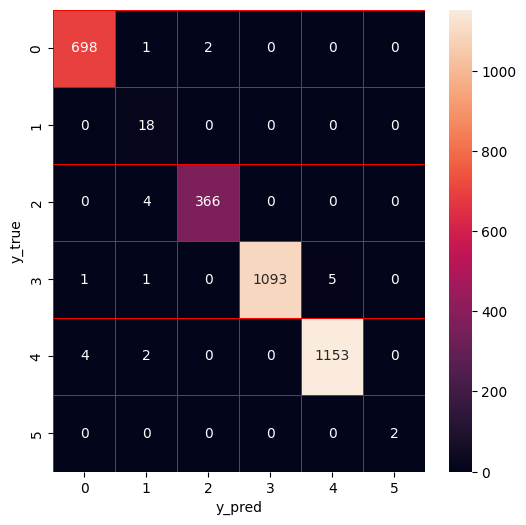

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [02:25<00:00,  7.27s/trial, best loss: -0.9970149253731343]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.8657220153560546, 'max_depth': 83.0, 'n_estimators': 65.0}


Accuracy of XGBoost: 0.9967164179104477
Precision of XGBoost: 0.9967168787313287
Recall of XGBoost: 0.9967164179104477
F1-score of XGBoost: 0.9967164747054857
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       701
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       370
           3       1.00      1.00      1.00      1100
           4       1.00      1.00      1.00      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       1.00      1.00      1.00      3350
weighted avg       1.00      1.00      1.00      3350



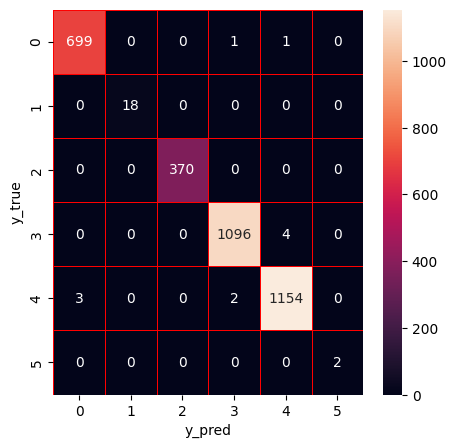

In [ ]:
xg = xgb.XGBClassifier(learning_rate= 0.7340229699980686, n_estimators = 70, max_depth = 14)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Accuracy of RF: 0.9970149253731343
Precision of RF: 0.9970187926610734
Recall of RF: 0.9970149253731343
F1-score of RF: 0.9970157612686112
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       701
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       370
           3       1.00      1.00      1.00      1100
           4       1.00      1.00      1.00      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       1.00      1.00      1.00      3350
weighted avg       1.00      1.00      1.00      3350



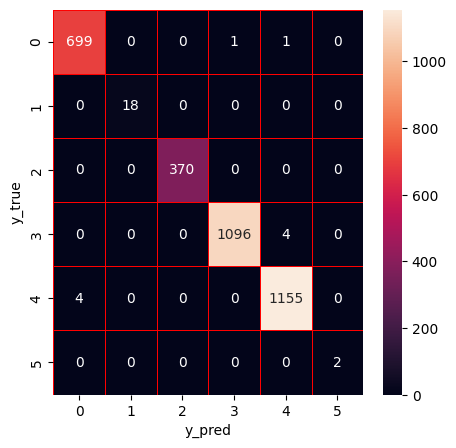

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [01:56<00:00,  5.85s/trial, best loss: -0.9964179104477612]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 13.0, 'max_features': 3.0, 'min_samples_leaf': 1.0, 'min_samples_split': 3.0, 'n_estimators': 64.0}


Accuracy of RF: 0.9940298507462687
Precision of RF: 0.9940706483603963
Recall of RF: 0.9940298507462687
F1-score of RF: 0.9940371009165322
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       701
           1       0.95      1.00      0.97        18
           2       1.00      0.99      0.99       370
           3       1.00      0.99      1.00      1100
           4       0.99      0.99      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           0.99      3350
   macro avg       0.99      1.00      0.99      3350
weighted avg       0.99      0.99      0.99      3350



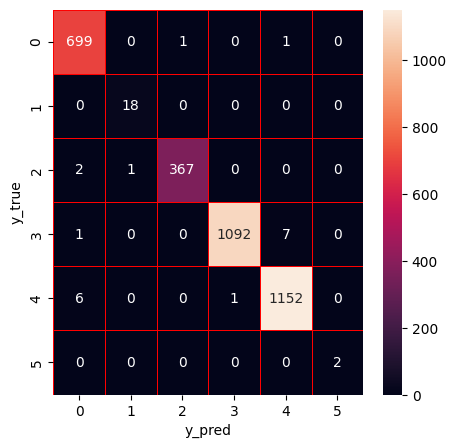

In [ ]:
rf_hpo = RandomForestClassifier(n_estimators = 71, min_samples_leaf = 1, max_depth = 46, min_samples_split = 9, max_features = 20, criterion = 'entropy')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

Accuracy of DT: 0.9934328358208955
Precision of DT: 0.9934979875035391
Recall of DT: 0.9934328358208955
F1-score of DT: 0.9934483526430126
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       701
           1       0.90      1.00      0.95        18
           2       0.99      0.99      0.99       370
           3       1.00      0.99      1.00      1100
           4       0.99      1.00      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           0.99      3350
   macro avg       0.98      0.99      0.99      3350
weighted avg       0.99      0.99      0.99      3350



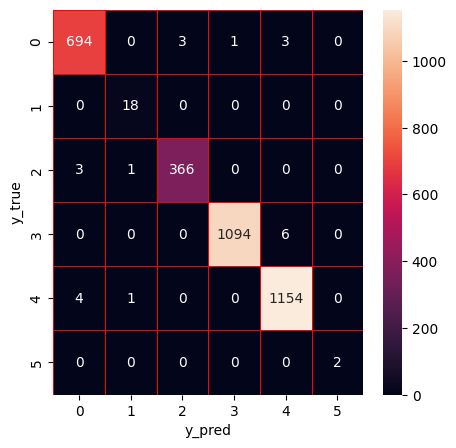

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:05<00:00,  9.03trial/s, best loss: -0.9964179104477612]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 47.0, 'max_features': 17.0, 'min_samples_leaf': 2.0, 'min_samples_split': 7.0}


Accuracy of DT: 0.9940298507462687
Precision of DT: 0.9940726482251175
Recall of DT: 0.9940298507462687
F1-score of DT: 0.9940387754862523
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       701
           1       0.95      1.00      0.97        18
           2       0.99      0.99      0.99       370
           3       1.00      0.99      1.00      1100
           4       0.99      0.99      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           0.99      3350
   macro avg       0.99      1.00      0.99      3350
weighted avg       0.99      0.99      0.99      3350



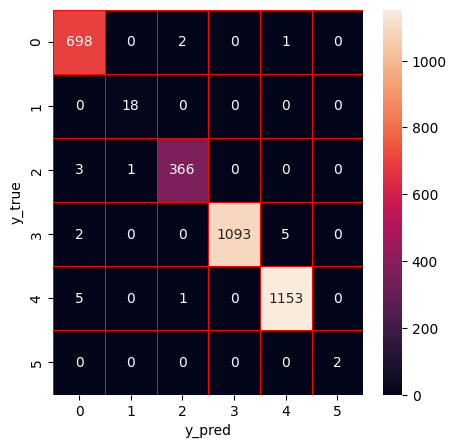

In [ ]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 47, min_samples_split = 3, max_features = 19, criterion = 'gini')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

Accuracy of ET: 0.9964179104477612
Precision of ET: 0.9964391652734461
Recall of ET: 0.9964179104477612
F1-score of ET: 0.9964229541752592
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       701
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00       370
           3       1.00      1.00      1.00      1100
           4       1.00      1.00      1.00      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       0.99      1.00      0.99      3350
weighted avg       1.00      1.00      1.00      3350



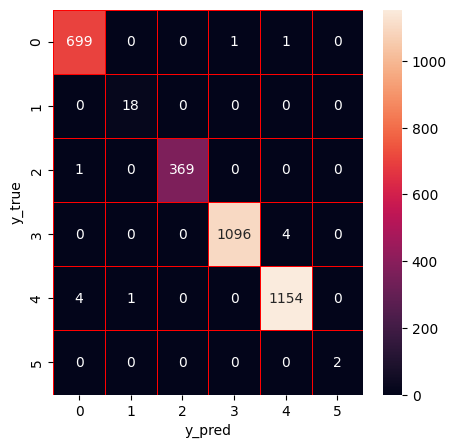

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:20<00:00,  1.01s/trial, best loss: -0.9943283582089553]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 19.0, 'max_features': 17.0, 'min_samples_leaf': 3.0, 'min_samples_split': 6.0, 'n_estimators': 67.0}


Accuracy of ET: 0.9958208955223881
Precision of ET: 0.9958278656169292
Recall of ET: 0.9958208955223881
F1-score of ET: 0.9958223261853618
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       701
           1       1.00      1.00      1.00        18
           2       0.99      1.00      0.99       370
           3       1.00      1.00      1.00      1100
           4       0.99      1.00      1.00      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       1.00      1.00      1.00      3350
weighted avg       1.00      1.00      1.00      3350



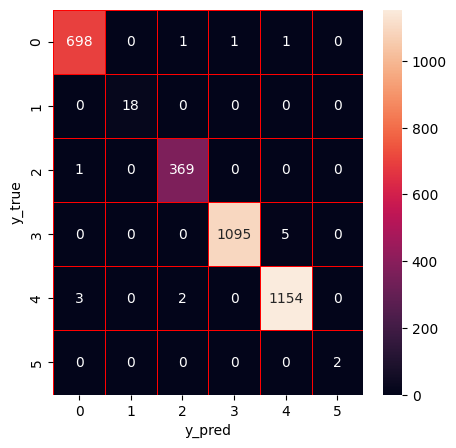

In [ ]:
et_hpo = ExtraTreesClassifier(n_estimators = 53, min_samples_leaf = 1, max_depth = 31, min_samples_split = 5, max_features = 20, criterion = 'entropy')
et_hpo.fit(X_train,y_train) 
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

In [ ]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,4,4,4,4
1,3,3,3,3
2,0,0,0,0
3,3,3,3,3
4,0,0,0,0


In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
dt_train.shape

(22593, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9967164179104477
Precision of Stacking: 0.9967168787313287
Recall of Stacking: 0.9967164179104477
F1-score of Stacking: 0.9967164747054857
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       701
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       370
           3       1.00      1.00      1.00      1100
           4       1.00      1.00      1.00      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       1.00      1.00      1.00      3350
weighted avg       1.00      1.00      1.00      3350



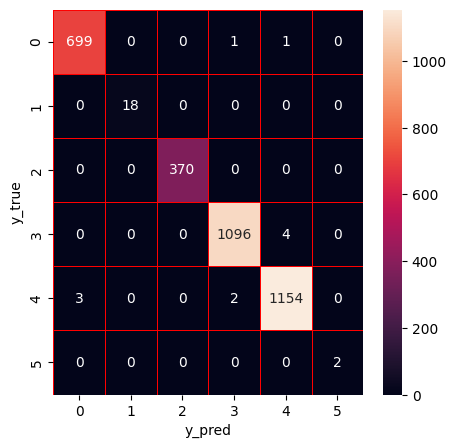

In [ ]:
stk = StackingClassifier(estimators=[('rf',rf),('dt',dt),('et',et)],final_estimator=xg).fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#(new_output).all()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:16<00:00,  1.23trial/s, best loss: -0.9967164179104477]
XGBoost: Hyperopt estimated optimum {'learning_rate': -1.0013081090619935, 'max_depth': 62.0, 'n_estimators': 80.0}


Accuracy of Stacking: 0.9967164179104477
Precision of Stacking: 0.9967168787313287
Recall of Stackingt: 0.9967164179104477
F1-score of Stacking: 0.9967164747054857
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       701
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       370
           3       1.00      1.00      1.00      1100
           4       1.00      1.00      1.00      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       1.00      1.00      1.00      3350
weighted avg       1.00      1.00      1.00      3350



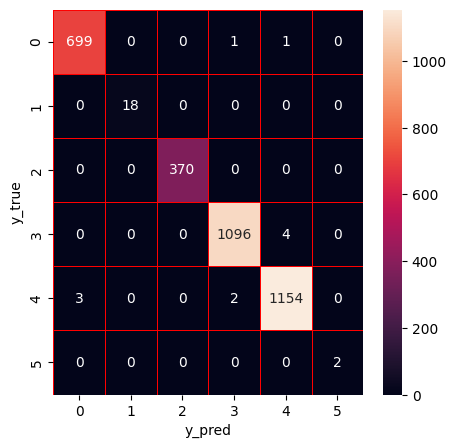

In [ ]:
xg = xgb.XGBClassifier(learning_rate= 0.19229249758051492, n_estimators = 30, max_depth = 36)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of Stacking: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stackingt: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn import metrics  
print()

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_true,y_predict)*100)


ACCURACY OF THE MODEL:  99.67164179104478


In [ ]:
new_input = x_train

In [ ]:
new_output = stk.predict(new_input)
new_output

array([4, 3, 0, ..., 5, 5, 5])

In [ ]:
new_output
if new_output[0]==[0]:
    print('BENIGN')
elif new_output[0] == [1]:
    print('DOS GOLDENEYE')
elif new_output[0] == [2]:
    print('DOS HULK')
elif new_output[0] == [3]:
    print('DOS SLOWHTTPTEST')
else:
    print('DOS SLOWLORIS')

DOS SLOWLORIS


In [ ]:
# new_input = x_test.values

In [ ]:
 df=pd.read_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km.csv')

In [ ]:
 df.Label.value_counts()

4    5796
3    5499
0    3506
2    1848
1      88
5      11
Name: Label, dtype: int64

In [ ]:
 df1 = df[df['Label'] != 4]
 df1['Label'][df1['Label'] > 0] = 1
 df1.to_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km_without_portscan.csv',index=0)

In [ ]:
 df2 = df[df['Label'] == 4]
 df2['Label'][df2['Label'] == 4] = 1
 df2.to_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km_portscan.csv',index=0)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km_without_portscan.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km_portscan.csv')

In [ ]:
features = df1.drop(['Label'],axis=1).dtypes[df1.dtypes != 'object'].index
df1[features] = df1[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df2[features] = df2[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [ ]:
df1.Label.value_counts()

1    7446
0    3506
Name: Label, dtype: int64

In [ ]:
df2.Label.value_counts()

1    5796
Name: Label, dtype: int64

In [ ]:
df2p=df1[df1['Label']==0]
df2pp=df2p.sample(n=None, frac=5796/7435, replace=False, weights=None, random_state=None, axis=0)
df2=pd.concat([df2, df2pp])

In [ ]:
df2.Label.value_counts()

1    5796
0    2733
Name: Label, dtype: int64

In [ ]:
df = df1.append(df2)

In [ ]:
X = df.drop(['Label'],axis=1) .values
y = df.iloc[:, -1].values.reshape(-1,1)
y=y.astype('int')
y=np.ravel(y)
pd.Series(y).value_counts()

1    13242
0     6239
dtype: int64

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)

In [ ]:
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [ ]:
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break  

In [ ]:
X_fs = df[fs].values

In [ ]:
X_fs.shape

(19481, 54)

In [ ]:
X_fs

array([[-0.24825073, -0.46978699, -0.93375348, ..., -1.61308397,
         0.81058163, -0.42780344],
       [-0.24825073, -0.47218518, -0.93375348, ..., -1.61308397,
         0.81058163, -0.42780344],
       [-0.24825073, -0.46930736, -0.93375348, ..., -1.61308397,
         0.81058163, -0.42780344],
       ...,
       [-0.24825073, -0.47842048, -0.93375348, ..., -1.61308397,
         0.81058163, -0.42780344],
       [-0.24217798, -0.48033903, -0.93375348, ..., -1.61308397,
         0.81058163, -0.42780344],
       [-0.2144168 ,  0.42809511, -0.37766393, ..., -1.61308397,
        -0.52699408,  0.51250667]])

In [ ]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [ ]:
X_fss = fcbf.fit_transform(X_fs,y)

In [ ]:
X_fss.shape

(19481, 20)

In [ ]:
X_fss

array([[-0.24825073, -0.93375348,  0.27883289, ..., -0.22192062,
        -0.08466248, -0.08466248],
       [-0.24825073, -0.93375348,  0.27883289, ..., -0.22192062,
        -0.08466248, -0.08466248],
       [-0.24825073, -0.93375348,  0.26169176, ..., -0.22192062,
        -0.08466248, -0.08466248],
       ...,
       [-0.24825073, -0.93375348,  0.33025627, ..., -0.22192062,
        -0.08466248, -0.08466248],
       [-0.24217798, -0.93375348,  0.53594982, ..., -0.22192062,
        -0.08466248, -0.08466248],
       [-0.2144168 , -0.37766393, -0.28682436, ..., -0.20466347,
        -0.02397247, -0.02397247]])

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 4, kernel = 'rbf')
kpca.fit(X_fss, y)
X_kpca = kpca.transform(X_fss)


In [ ]:
X_train = X_kpca[:len(df1)]
y_train = y[:len(df1)]
X_test = X_kpca[len(df1):]
y_test = y[len(df1):]

In [ ]:
pd.Series(y_train).value_counts()


1    7446
0    3506
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={0:11389})
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

0    11389
1     7446
dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

1    5796
0    2733
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN,MeanShift
from sklearn.cluster import SpectralClustering,AgglomerativeClustering,AffinityPropagation,Birch,MiniBatchKMeans,MeanShift 
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
def CL_kmeans(X_train, X_test, y_train, y_test,n,b=100):
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y_test,result2)
    print(str(acc))
    print(cm)

In [ ]:
CL_kmeans(X_train, X_test, y_train, y_test, 8)

              precision    recall  f1-score   support

           0       0.37      0.98      0.53      2733
           1       0.96      0.20      0.33      5796

    accuracy                           0.45      8529
   macro avg       0.66      0.59      0.43      8529
weighted avg       0.77      0.45      0.39      8529

0.4489389142924141
[[2683   50]
 [4650 1146]]


In [ ]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-0m3s0hn8
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-0m3s0hn8
  Resolved https://github.com/scikit-optimize/scikit-optimize.git to commit a2369ddbc332d16d8ff173b12404b03fea472492
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyaml-23.5.9-py3-none-any.whl (17 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.0-py2.py3-none-any.whl size=100250 sha256=acd405926de84303a83296cece292755083787bf0270d12a18e59ff8f3fb0b37
  Stored in directory: /tmp/pip-ephem-wheel-cache-mx6dh18b/wheels/2f/f0/ed/db529a96372d05bd34f6c3a2fa7c08ef7a8314315ac46e49d7
Successfully built scikit-optimize


In [ ]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn import metrics

space  = [Integer(2, 50, name='n_clusters')]
@use_named_args(space)
def objective(**params):
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    cm=metrics.accuracy_score(y_test,result2)
    print(str(n)+" "+str(cm))
    return (1-cm)
from skopt import gp_minimize
import time
t1=time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
t2=time.time()
print(t2-t1)
print("Best score=%.4f" % (1-res_gp.fun))
print("""Best parameters: n_clusters=%d""" % (res_gp.x[0]))

30 0.5049829991792707
43 0.5269081955680619
43 0.5006448587173173
43 0.5348809942548951
32 0.49701020049243755
20 0.7048892015476609
16 0.505569234376832
5 0.8365576269199203
15 0.5066244577324422
25 0.32805721655528197
4 0.5280806659631845
5 0.8324539805369915
5 0.8203775354672295
5 0.6346582248798218
5 0.820612029546254
5 0.8362058858013836
5 0.6391136123812874
5 0.8230742173760113
5 0.6357134482354321
5 0.8230742173760113
16.56619930267334
Best score=0.8366
Best parameters: n_clusters=5


In [ ]:
#Hyperparameter optimization by BO-TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

def objective(params):
    params = {
        'n_clusters': int(params['n_clusters']), 
    }
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    score=metrics.accuracy_score(y_test,result2)
    print(str(params['n_clusters'])+" "+str(score))
    return {'loss':1-score, 'status': STATUS_OK }
space = {
    'n_clusters': hp.quniform('n_clusters', 2, 50, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

5 0.8202602884277173
20 0.6355962011959198
12 0.4518700902802204
20 0.7251729393832805
4 0.822018994020401
27 0.5111970922734201
19 0.6452104584359245
3 0.7073513893774183
21 0.3110563958260054
44 0.7040684722710752
11 0.5022863172704889
35 0.5032242935865869
37 0.6557626919920272
28 0.3100011724703951
46 0.50650721069293
2 0.8056044084886856
30 0.7096963301676633
24 0.7237659749091335
23 0.5304256067534294
37 0.416813225466057
100%|██████████| 20/20 [00:18<00:00,  1.06trial/s, best loss: 0.17798100597959898]
Random Forest: Hyperopt estimated optimum {'n_clusters': 4.0}


In [ ]:
CL_kmeans(X_train, X_test, y_train, y_test, 5)

              precision    recall  f1-score   support

           0       0.47      0.97      0.63      2733
           1       0.97      0.48      0.65      5796

    accuracy                           0.64      8529
   macro avg       0.72      0.73      0.64      8529
weighted avg       0.81      0.64      0.64      8529

0.6408723179739712
[[2657   76]
 [2987 2809]]


In [ ]:
def Anomaly_IDS(X_train, X_test, y_train, y_test,n,b=100):
    # CL-kmeans
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    # print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y_test,result2)
    # print(str(acc))
    # print(cm)
    return result2

    

In [ ]:
new_input = X_test

In [ ]:
new_output = (Anomaly_IDS(X_train, X_test, y_train, y_test,10,b=100))

In [ ]:
new_output
if new_output[1]==[0]:
    print('BENIGN')
elif new_output[1] == [1]:
    print('DOS GOLDENEYE')
elif new_output[1] == [2]:
    print('DOS HULK')
elif new_output[1] == [3]:
    print('DOS SLOWHTTPTEST')
else:
    print('DOS SLOWLORIS')

BENIGN


In [ ]:
new_output1 = stk.predict(new_input)

In [ ]:
new_output
if new_output[0]==[0]:
    print('Normal')
elif new_output[0] == [1]:
    print('Unknown attack')